# CECS 550 Pattern Recognition: Final Project

# Diabetes Prediction Using Machine Learning

Diabetes is a chronic health condition that results in high blood sugar. It is a serious health issue and a precursor to life threatning conditions like a heart-stroke. We use Machine Learning techniques to predict if a patient has chances of having diabetes. Detecting Diabetes at an early stage helps prevent serious symptoms by making an individual aware of current condition help them transition into making healthy lifestyle choices.

### Presented By - Group 4
Swapnil Kawade<br>
Ankit Panwar<br>
Akshay Patil<br>
Abhijit Chaudhary<br>
Anish Katkamwar

## 1. Introduction to DataSet

## 1.1 About Dataset:

The dataset was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as a part of the Pima Indians Diabetes Database

The DataSet can be found at: https://www.kaggle.com/datasets/kandij/diabetes-dataset

## 1.2 Dataset Description:

The dataset includes following parameters to help us gauge whether a person has diabetes or not.

1. Pregnancies: Total number of pregancies the patient has had.
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history
8. Age: Age of Person in years
9. Outcome: Class variable (0 or 1)

## 1.3 Loading the Dataset


In [1]:
# Adding the imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#  Diabetes Data Frame
ddf = pd.read_csv('diabetes2.csv')

# Print the head
ddf.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 1.4 Data Cleaning and Preprocessing

### Previewing Data

In [2]:
# DataSet info

ddf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:

ddf.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


As we can see, the average age of Patients in the dataset comes around 33 with an average BMI of 31. 

Checking if there are any null values

In [4]:

ddf.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From above results, we can see that there are no null values in the dataset.

In the dataset it is mentioned that that the null values are replaced with 0. Thus, we need to identify such values and replace them with the Mean of the corresponding column so we don't get deviated results.

Replacing all Zeros with Nan


In [5]:

ddf[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]] = ddf[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]].replace(0, np.NaN)


Showing the total number of values which are null / NaN

In [6]:

print(ddf.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Showcasing 

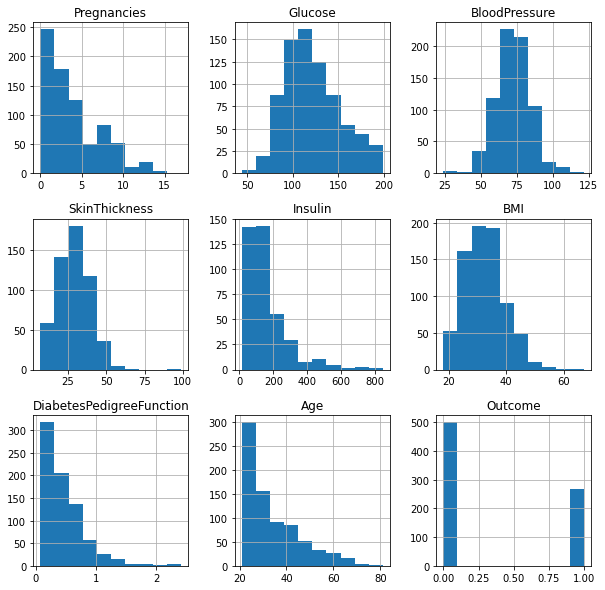

In [7]:

beforeCleaning = ddf.hist(figsize = (10,10))


Replacing the NaN wit the Mean

In [8]:

glucoseMean = ddf['Glucose'].mean()
bloodPressureMean = ddf['BloodPressure'].mean()
skinThicknessMean = ddf['SkinThickness'].mean()
InsulinMean = ddf['Insulin'].mean()
bmiMean = ddf['BMI'].mean()

ddf['Glucose'] = ddf['Glucose'].fillna(glucoseMean)
ddf['BloodPressure'] = ddf['BloodPressure'].fillna(bloodPressureMean)
ddf['SkinThickness'] = ddf['SkinThickness'].fillna(skinThicknessMean)
ddf['Insulin'] = ddf['Insulin'].fillna(InsulinMean)
ddf['BMI'] = ddf['BMI'].fillna(bmiMean)


In [9]:

print(ddf.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


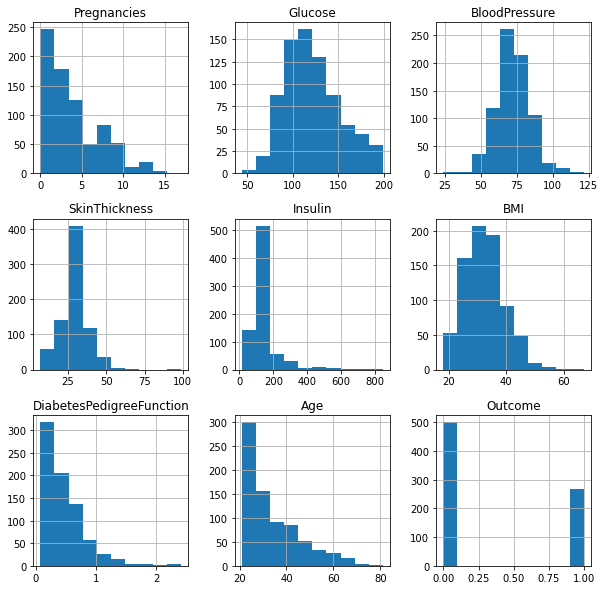

In [10]:

afterCleaning = ddf.hist(figsize = (10,10))


## 2. Objective

Implement various machine learning models and analyze which model gives more accurate results for predicting Diabetes amongst female patients. This analysis can help detect diabetes avoid any difficulties faced during early stages of pregnancies. Models that are implemented in this project are as follows:
1. Logistic Regression
2. Random Forest
3. Decision Tree

## 3. Exploratory Data Analysis

Finding Corelation between features


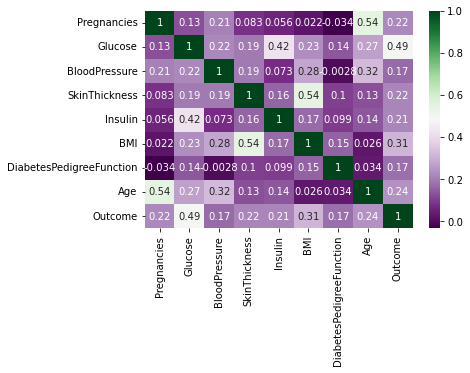

In [11]:

p = sns.heatmap(ddf.corr(),annot=True, cmap ='PRGn')


Plotting Insulin vs Glucose


Text(0, 0.5, 'Glucose')

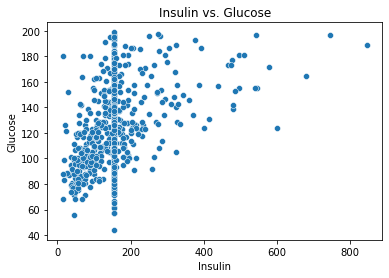

In [12]:


plot1 = sns.scatterplot(x=ddf["Insulin"], y=ddf["Glucose"], data=ddf);

plot1.set_title("Insulin vs. Glucose")
plot1.set_xlabel("Insulin")
plot1.set_ylabel("Glucose")


Insulin and Glucose are positively correlated

Plotting DiabetisPedigreeFunction vs BloodPressure

Text(0, 0.5, 'BloodPressure')

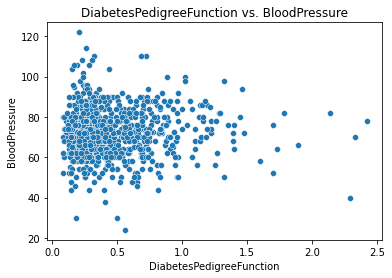

In [13]:

plot2 = sns.scatterplot(x=ddf["DiabetesPedigreeFunction"], y=ddf["BloodPressure"], data=ddf);

plot2.set_title("DiabetesPedigreeFunction vs. BloodPressure")
plot2.set_xlabel("DiabetesPedigreeFunction")
plot2.set_ylabel("BloodPressure")


DiabetesPedigreeFunction and BloodPressure are loosely correlated

Plotting Pregnancies vs Age

Text(0, 0.5, 'Age')

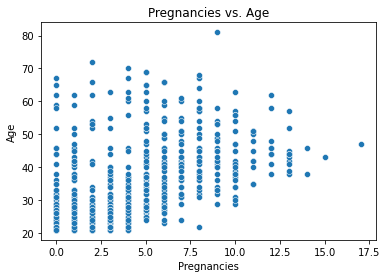

In [14]:
# Pregnancies vs Age

plot3 = sns.scatterplot(x=ddf["Pregnancies"], y=ddf["Age"], data=ddf);

plot3.set_title("Pregnancies vs. Age")
plot3.set_xlabel("Pregnancies")
plot3.set_ylabel("Age")


Pregnancies and Age are positively correlated

## Feature Selection

Irrelevant or partially relevant features can negatively impact model performance.

Feature Selection Methods:
1. Univariate Selection
2. Feature Importance
3.Correlation Matrix with Heatmap

### Univariate Selection

In [15]:

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = ddf[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]]  #independent columns
y = ddf[["Outcome"]]

# extract top 7 best features
top7features = SelectKBest(score_func=chi2, k=7)
fit = top7features.fit(X,y)
ddfscores = pd.DataFrame(fit.scores_)
ddfcolumns = pd.DataFrame(X.columns)

# concat for better visualization 
top7featureScores = pd.concat([ddfcolumns,ddfscores],axis=1)
top7featureScores.columns = ['Features','Score']  # naming the dataframe columns
print(top7featureScores.nlargest(7,'Score'))  # print 7 best features


                   Features        Score
3                   Insulin  1638.618150
0                   Glucose  1418.705030
5                       Age   181.303689
4                       BMI   108.678584
2             SkinThickness    94.245703
1             BloodPressure    42.749956
6  DiabetesPedigreeFunction     5.392682


### Feature Importance

[0.26048949 0.10662397 0.09640416 0.09675298 0.1588771  0.15603896
 0.12481334]


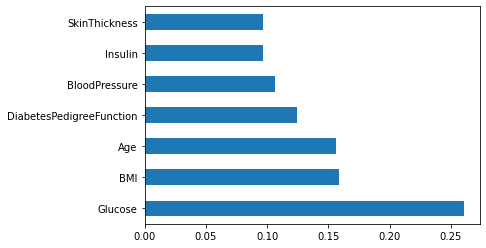

In [16]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

featureModel = ExtraTreesClassifier()
featureModel.fit(X,np.ravel(y))
print(featureModel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feature_importances = pd.Series(featureModel.feature_importances_, index=X.columns)
feature_importances.nlargest(7).plot(kind='barh')
plt.show()


### Heatmap

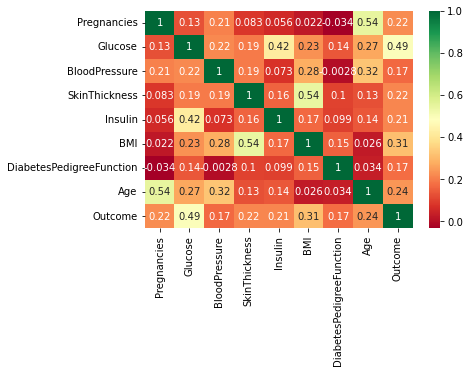

In [17]:

p = sns.heatmap(ddf.corr(),annot=True, cmap ='RdYlGn')


## Principal Component Analysis


In [18]:

from sklearn.preprocessing import StandardScaler

features = ['Insulin', 'Glucose', 'Age', 'BMI', 'SkinThickness', 'BloodPressure', 'DiabetesPedigreeFunction']

# Separating out the features
x = ddf.loc[:, features].values

# Separating out the target
y = ddf.loc[:,['Outcome']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


In [19]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [20]:

principalDf


,principal component 1,principal component 2
0,1.270617,-0.568798
1,-1.262555,0.079803
2,0.114239,-1.006101
3,-2.028398,0.371803
4,1.310667,2.493273
...,...,...
763,1.491765,-0.463403
764,-0.124274,0.452856
765,-1.145734,-0.622393
766,-0.183730,-0.736175


In [21]:

finalDf = pd.concat([principalDf, ddf[['Outcome']]], axis = 1)


In [22]:

finalDf


,principal component 1,principal component 2,Outcome
0,1.270617,-0.568798,1
1,-1.262555,0.079803,0
2,0.114239,-1.006101,1
3,-2.028398,0.371803,0
4,1.310667,2.493273,1
...,...,...,...
763,1.491765,-0.463403,0
764,-0.124274,0.452856,0
765,-1.145734,-0.622393,0
766,-0.183730,-0.736175,1


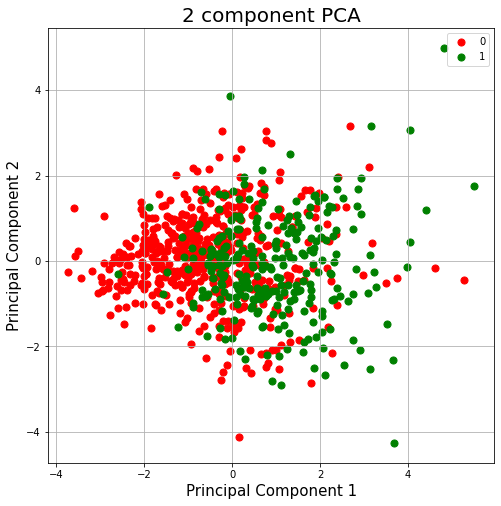

In [23]:
#  Visualise 2D Projection

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [24]:

pca.explained_variance_ratio_


array([0.31167436, 0.16979409])

## 4.Model Building and Evaluation

We build three different models and evaluate them using various metrics. The features used to train the models have been selected according to the output from feature selection.

### 1. Logistic Regression

In [25]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = ddf[["Glucose", "DiabetesPedigreeFunction", "BloodPressure", "BMI", "Age"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
LR = LogisticRegression()
LR.fit(X_train, np.ravel(y_train))
y_pred = LR.predict(X_test)
print("Accuracy =", LR.score(X_test,y_test))


Accuracy = 0.8051948051948052


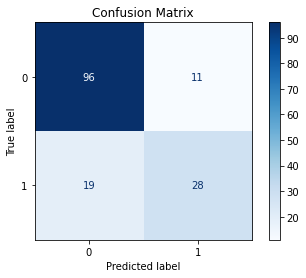

In [26]:

cm = confusion_matrix(y_test, y_pred, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


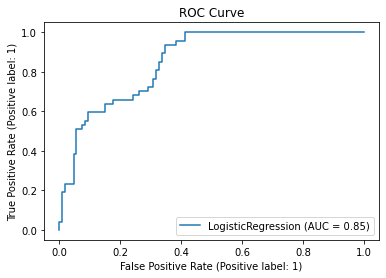

In [27]:

from sklearn import metrics

metrics.plot_roc_curve(LR, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [28]:

report = metrics.classification_report(y_test, y_pred)
print("Classification Report\n")
print(report)


Classification Report

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



### 2. Random Forest

In [29]:

from sklearn.ensemble import RandomForestClassifier

#X = ddf[["Glucose", "DiabetesPedigreeFunction", "BloodPressure", "BMI", "Age"]]
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
RFC = RandomForestClassifier()
RFC.fit(X_train, np.ravel(y_train))
y_pred = RFC.predict(X_test)
print("Accuracy =", RFC.score(X_test,y_test))


Accuracy = 0.8051948051948052


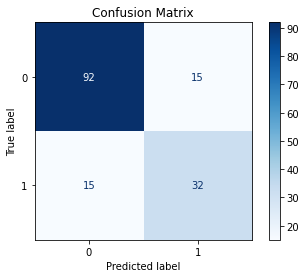

In [30]:

cm = confusion_matrix(y_test, y_pred, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


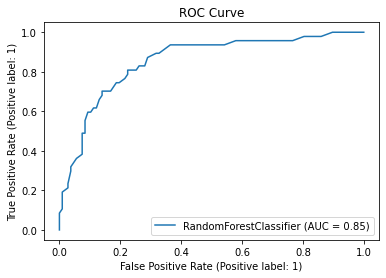

In [31]:

metrics.plot_roc_curve(RFC, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [32]:

report = metrics.classification_report(y_test, y_pred)
print("Classification Report\n")
print(report)


Classification Report

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.68      0.68      0.68        47

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



### 3. Decision Tree

In [33]:

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
print("Accuracy =", DTC.score(X_test,y_test))


Accuracy = 0.7142857142857143


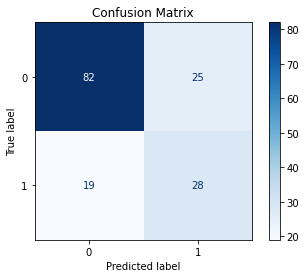

In [34]:

cm = confusion_matrix(y_test, y_pred, labels=DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


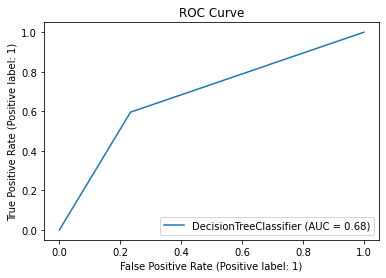

In [35]:

metrics.plot_roc_curve(DTC, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [36]:

report = metrics.classification_report(y_test, y_pred)
print("Classification Report\n")
print(report)


Classification Report

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       107
           1       0.53      0.60      0.56        47

    accuracy                           0.71       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.71      0.72       154



### ROC Curve Comparing all three classification models

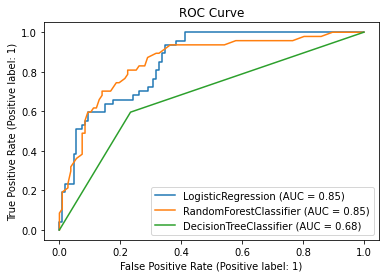

In [37]:

fig = metrics.plot_roc_curve(LR, X_test, y_test)
fig1 = metrics.plot_roc_curve(RFC, X_test, y_test, ax = fig.ax_)
fig2 = metrics.plot_roc_curve(DTC, X_test, y_test, ax = fig1.ax_)
plt.title("ROC Curve")
plt.show()


## Conclusion

As determined by the various model evaluation metrics used above, Logistic Regression is the best model for the Pima Indians Diabetes Dataset. Our model's ability to predict Diabetes using some commonly used lab findings is satisfactory. These models can be implemented to assist doctors in forecasting the onset of diabetes in female patients and offering required preventive measures to avoid complications during their pregnancies or predicting diabetes at an early stage of pregnancy.

The most relevant variables in these models were Blood Glucose, Body Mass Index, Insulin, and DiabetesPedigreeFunction.

## Future Analysis

We can implement a deep neural network, along with some added relevant features and a larger dataset which would help in giving more accurate results. We can also use our models with a few modifications to cater to a larger audience including all the genders.